<font color='blue' size=10><center> Drug Classification </center></font>
<hr/>
<font color='magenta' size=2> - Durgesh Samariya | The ML PhD Student </font>

<font color='red' size=5><center> Please Upvote my kernel if you like my work. </center></font>

## Problem Statement:
----
XYZ Pharma company/Hospital wants to build machine learning model to predict which drug type is good for the patient based on patient details.

In this project, I used following classification algorithms.

- KNN Classification
- Decision Tree Classification
- Support Vector Machine
- Random Forest
- Gaussian Naive Bayes
- Stochastic Gradient Descent
- Linear SVC

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/drug-classification/drug200.csv


# Loading and Exploring Data

In [5]:
data = pd.read_csv('../input/drug-classification/drug200.csv')

## Data size and Structure

Let's have look at example samples.

In [6]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Features in data.

In [7]:
print('='*50)
print("Columns in data")
print('='*50)
print(data.columns.values)

Columns in data
['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K' 'Drug']


## The target feature is
Drug type
## The feature sets are:
Age: Age of patient

Sex: Sex/ gender type of patient

Blood Pressure Levels (BP)

Cholesterol Levels

Na to Potassium Ration

In [8]:
print('='*20)
print("Data shape")
print('='*20)
print(data.shape)

Data shape
(200, 6)


Dataset contains only 200 samples.

## Descriptive Statistics

In [9]:
 data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
print('='*50)
print("\nData Information\n")
print('='*50) 
print(data.info())


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [11]:
# lets check the correlation
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [12]:
# lets check the covriance
data.cov()

,Age,Na_to_K
Age,273.714347,-7.543752
Na_to_K,-7.543752,52.185533


In [13]:

data.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

# Exploring features and relation with target class

## The Class Variable; Drug Type

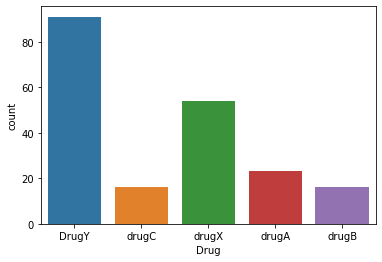

In [14]:
sns.countplot('Drug', data=data)

## Sex / Gender

In [15]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [16]:
df = pd.DataFrame(data.groupby(['Sex','Drug'])['Drug'].count())
df

Drug
Sex Drug       
F   DrugY    47
    drugA     9
    drugB     6
    drugC     7
    drugX    27
M   DrugY    44
    drugA    14
    drugB    10
    drugC     9
    drugX    27

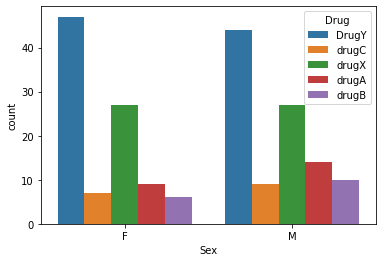

In [17]:
sns.countplot(x='Sex', hue='Drug', data=data)

## BP

In [18]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [19]:
df = pd.DataFrame(data.groupby(['BP','Drug'])['Drug'].count())
df

Drug
BP     Drug       
HIGH   DrugY    38
       drugA    23
       drugB    16
LOW    DrugY    30
       drugC    16
       drugX    18
NORMAL DrugY    23
       drugX    36

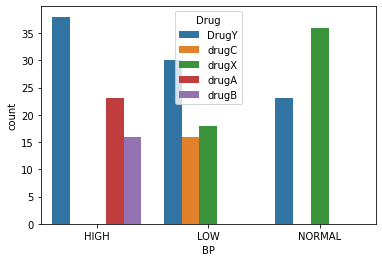

In [20]:
sns.countplot(x='BP', hue='Drug', data=data)

In [21]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
